# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

sns.set()
sns.set_context("notebook")
sns.set_style("whitegrid")

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

        
        
# https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | sorland
Processing Record 4 of Set 1 | pangnirtung
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | woodward
Processing Record 7 of Set 1 | samarai
Processing Record 8 of Set 1 | ozernovskiy
Processing Record 9 of Set 1 | totolapan
Processing Record 10 of Set 1 | imeni babushkina
Processing Record 11 of Set 1 | vila franca do campo
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | kathmandu
Processing Record 14 of Set 1 | nuuk
Processing Record 15 of Set 1 | puri
Processing Record 16 of Set 1 | buala
Processing Record 17 of Set 1 | nanortalik
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | aranos
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | mount gambier
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,1.77,70,100,2.57,US,1673350119
1,mataura,-46.1927,168.8643,14.06,99,100,0.66,NZ,1673350119
2,sorland,67.6670,12.6934,4.92,72,100,7.70,NO,1673350119
3,pangnirtung,66.1451,-65.7125,-32.89,84,12,1.20,CA,1673350120
4,woodward,36.4337,-99.3904,5.57,52,0,1.54,US,1673350120
5,samarai,-10.6167,150.6667,27.35,78,96,4.78,PG,1673350120
6,ozernovskiy,51.5000,156.5167,-8.32,73,11,3.56,RU,1673350120
7,totolapan,18.5167,-96.1833,20.00,95,62,1.98,MX,1673350120
8,imeni babushkina,59.7573,43.1285,-20.11,80,4,4.51,RU,1673350121
9,vila franca do campo,37.7167,-25.4333,16.23,86,71,4.39,PT,1673350121


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,1.77,70,100,2.57,US,1673350119
1,mataura,-46.1927,168.8643,14.06,99,100,0.66,NZ,1673350119
2,sorland,67.6670,12.6934,4.92,72,100,7.70,NO,1673350119
3,pangnirtung,66.1451,-65.7125,-32.89,84,12,1.20,CA,1673350120
4,woodward,36.4337,-99.3904,5.57,52,0,1.54,US,1673350120


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

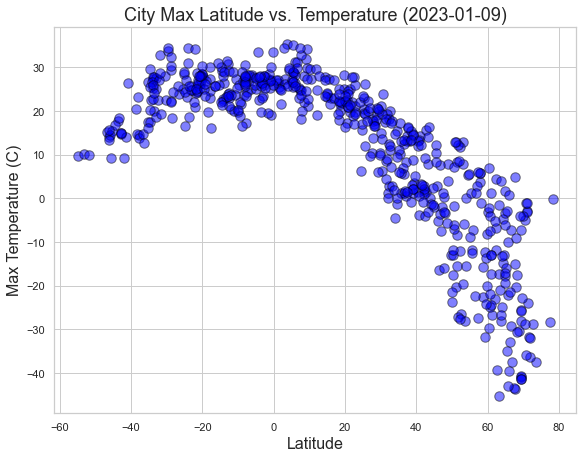

In [26]:
# Build scatter plot for latitude vs. temperature
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Max Temp"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Max Temperature (C)", fontsize=16)
plt.title("City Max Latitude vs. Temperature (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig1.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

#### Latitude Vs. Humidity

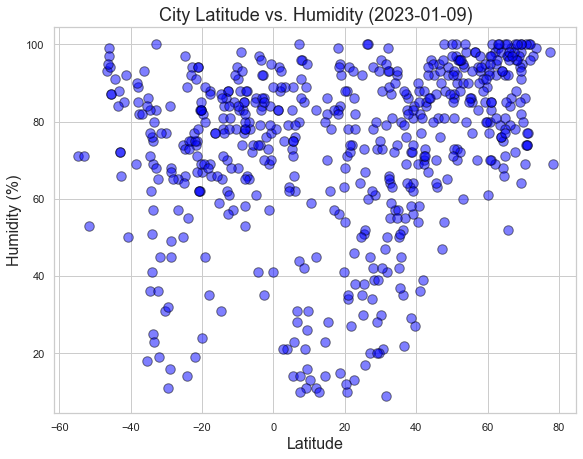

In [9]:
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Humidity"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Humidity (%)", fontsize=16)
plt.title("City Latitude vs. Humidity (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig2.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

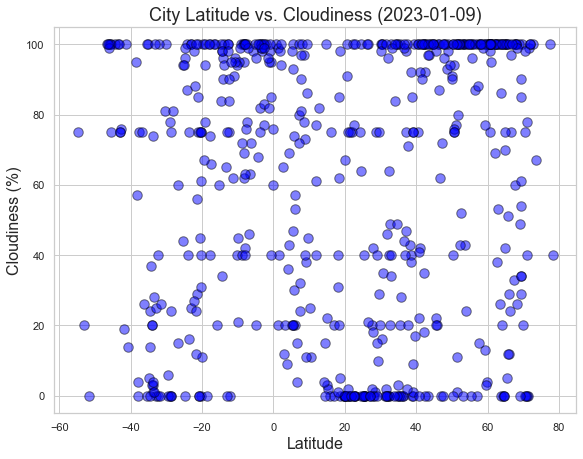

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Cloudiness"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.title("City Latitude vs. Cloudiness (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig3.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

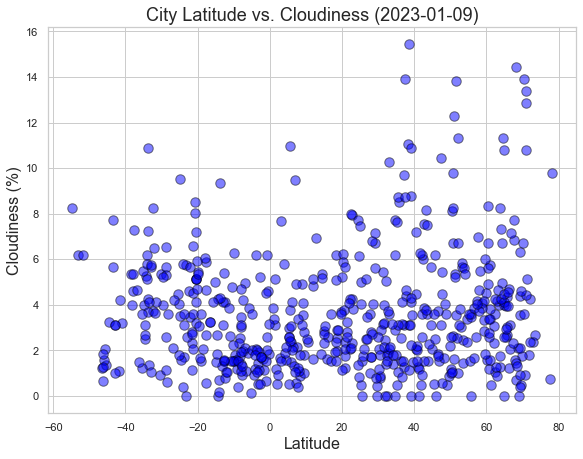

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Wind Speed"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.title("City Latitude vs. Cloudiness (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig4.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, 90, marker="o", facecolors="blue", alpha=0.5)
    plt.plot(x_values,regress_values,"r-", linewidth=3)
    plt.grid(True)
    print(f'The r-value is {rvalue}')
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=18,color="red")
    plt.xlabel('Latitude', fontsize=16)
    plt.ylabel(f'{ylabel}', fontsize=16)
    plt.grid() 

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)>= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,1.77,70,100,2.57,US,1673350119
2,sorland,67.6670,12.6934,4.92,72,100,7.70,NO,1673350119
3,pangnirtung,66.1451,-65.7125,-32.89,84,12,1.20,CA,1673350120
4,woodward,36.4337,-99.3904,5.57,52,0,1.54,US,1673350120
6,ozernovskiy,51.5000,156.5167,-8.32,73,11,3.56,RU,1673350120


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)< 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mataura,-46.1927,168.8643,14.06,99,100,0.66,NZ,1673350119
5,samarai,-10.6167,150.6667,27.35,78,96,4.78,PG,1673350120
10,rikitea,-23.1203,-134.9692,25.65,75,25,5.74,PF,1673350121
14,buala,-8.1450,159.5921,26.56,77,100,2.54,SB,1673350121
16,ushuaia,-54.8000,-68.3000,9.81,71,75,8.23,AR,1673350122


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8651908291159731


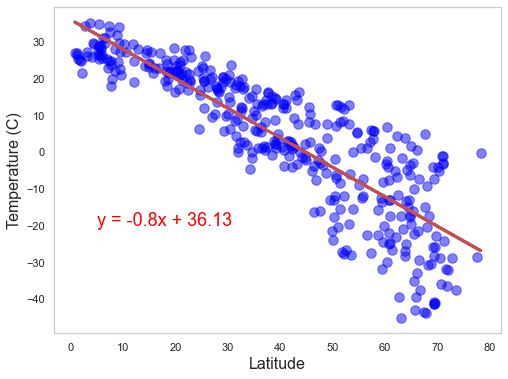

In [15]:
# Linear regression on Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, 5, -20, "Temperature (C)")
plt.savefig("output_data/Fig5.png",dpi=300, bbox_inches = "tight")

The r-value is 0.5079884993034937


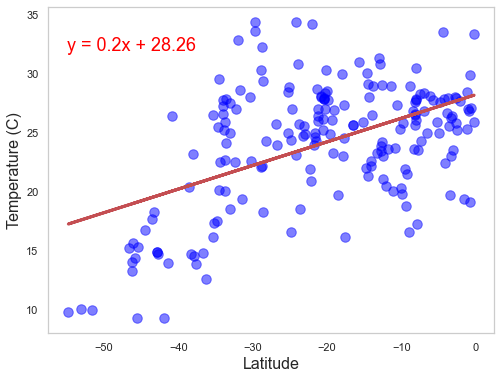

In [18]:
# Linear regression on Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, -55, 32, "Temperature (C)")
plt.savefig("output_data/Fig6.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:**

The correlation between Temperature and Latitude is stronger in the Northern Hemisphere(R-squared 86%) as opposed to the Southern Hemisphere (R-squared 23%)

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4607559031054927


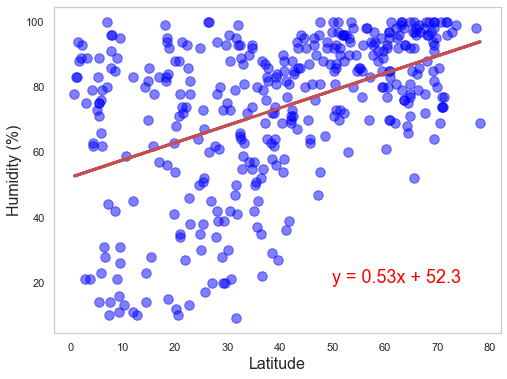

In [19]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, 50, 20, "Humidity (%)")
plt.savefig("output_data/Fig7.png",dpi=300, bbox_inches = "tight")

The r-value is 0.1082325511650748


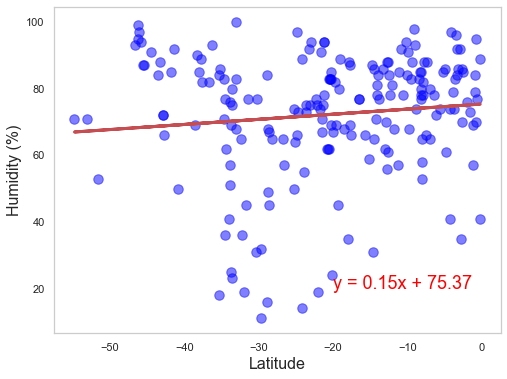

In [20]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, -20, 20, "Humidity (%)")
plt.savefig("output_data/Fig8.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:** 

The correlation between Humidity and Latitude is consistent in both the Northern Hemisphere(R-squared 43%) and the Southern Hemisphere (R-squared 37%)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.24761880365751351


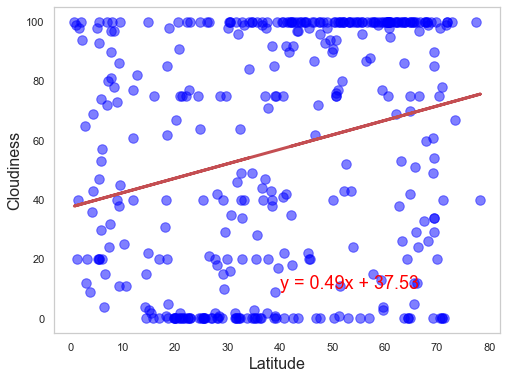

In [21]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, 40, 10, "Cloudiness")
plt.savefig("output_data/Fig9.png",dpi=300, bbox_inches = "tight")

The r-value is 0.315389016995343


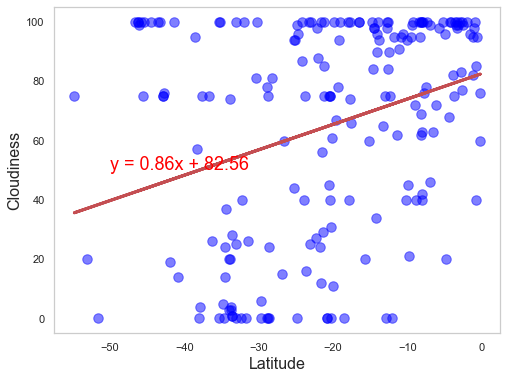

In [22]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, -50, 50, "Cloudiness")
plt.savefig("output_data/Fig10.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:**

The relationship between Cloudiness and Latitude is Stochastic.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.15695063856221028


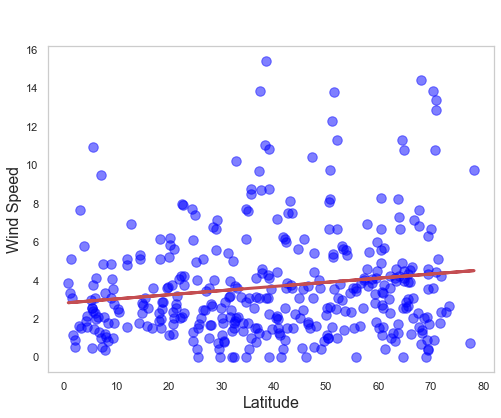

In [23]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, 0, 17.5, "Wind Speed")
plt.savefig("output_data/Fig11.png",dpi=300, bbox_inches = "tight")

The r-value is -0.302521506916585


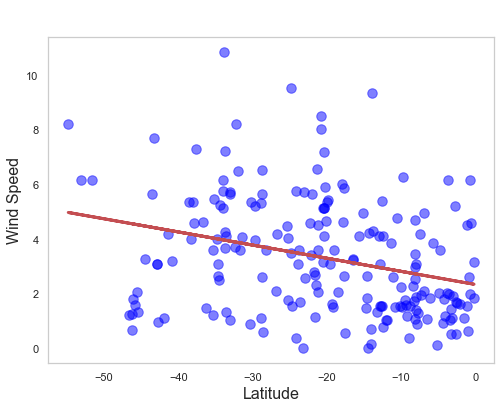

In [24]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, -55, 12, "Wind Speed")
plt.savefig("output_data/Fig12.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:** 

The correlation between Wind Speed and Latitude is stronger in the Northern Hemisphere as opposed to the Southern Hemisphere, with both plots indicating that wind speed lowers as we approach the equator.